# Analysis and residual generator design for a simple electric motor model

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import sys
new_paths = ['../Misc/', '../src/','../src/faultdiagnosistoolbox/build/lib.macosx-10.6-x86_64-2.7/']
[sys.path.append(d) for d in new_paths if not d in sys.path]
from misc import *
import faultdiagnosistoolbox as fdt
import sympy as sym

## Define model object

In [2]:
modelDef={}
modelDef['type'] = 'Symbolic'
modelDef['x'] = ['dI','dw','dth', 'I','w','th','alpha','DT','Tm','Tl']
modelDef['f'] = ['fR','fi','fw','fD']
modelDef['z']= ['V','yi','yw','yd']
modelDef['parameters'] = ['Ka','b','R','J','L']

sym.var(modelDef['x'])
sym.var(modelDef['f'])
sym.var(modelDef['z'])
sym.var(modelDef['parameters'])

modelDef['rels'] = [
  -V + I*(R+fR) + L*dI + Ka*I*w,
  -Tm + Ka*I**2,
  -J*dw + DT-b*w,
  -DT + Tm-Tl,
  -dth + w,
  -dw + alpha,
  -yi + I + fi,
  -yw + w + fw,
  -yd + DT + fD,
  fdt.DiffConstraint('dI','I'),
  fdt.DiffConstraint('dw','w'),
  fdt.DiffConstraint('dth','th')]

model = fdt.DiagnosisModel( modelDef, name='Electric Motor' )
model.Lint()

Model: Electric Motor

  Type:Symbolic, dynamic

  Variables and equations
    10 unknown variables
    4 known variables
    4 fault variables
    12 equations, including 3 differential constraints

  Degree of redundancy: 2
  Degree of redundancy of MTES set: 1


  Model validation finished with 0 errors and 0 warnings.


## Plot model properties

Plot model structure

<IPython.core.display.Javascript object>


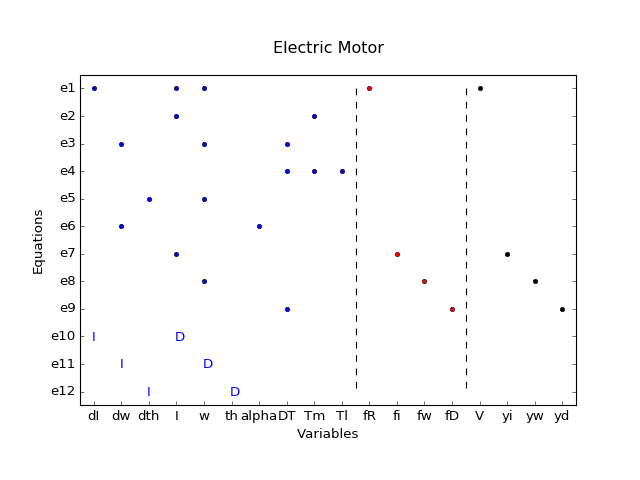

In [3]:
plt.figure(10)
model.PlotModel()

Plot isolability properties and the Dulmage-Mendelsoh decomposition, including a canonical form of the over determined part

<IPython.core.display.Javascript object>


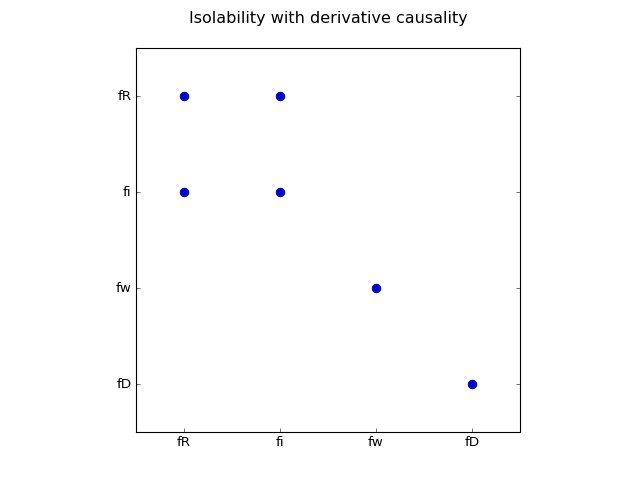

<IPython.core.display.Javascript object>


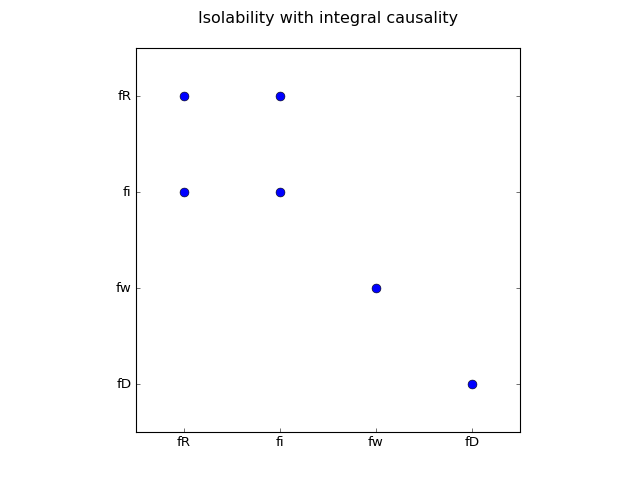

<IPython.core.display.Javascript object>


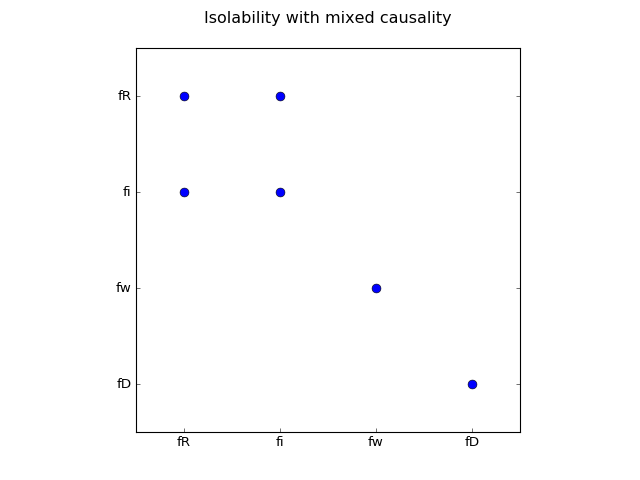

<IPython.core.display.Javascript object>


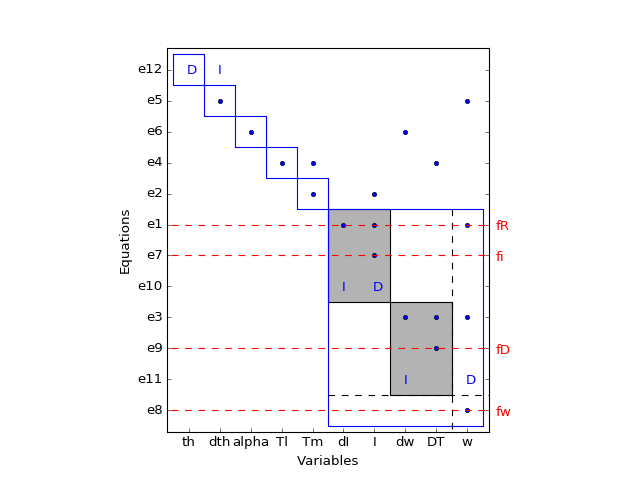

In [4]:
plt.figure(20)
model.IsolabilityAnalysis(plot=True, causality='der')
plt.title('Isolability with derivative causality'); 

plt.figure(21)
model.IsolabilityAnalysis(plot=True, causality='int')
plt.title('Isolability with integral causality'); 

plt.figure(22)
model.IsolabilityAnalysis(plot=True)
plt.title('Isolability with mixed causality'); 

plt.figure(24)
model.PlotDM(fault=True, eqclass=True)

## Residual generator design

Compute set of MSO sets

In [5]:
msos = model.MSO()
print "Found " + str(len(msos)) + " MSO sets"

Found 3 MSO sets


Generate Python code for residual generators based on MSO1

In [6]:
mIdx = 0
print model.MSOCausalitySweep(msos[mIdx])
for k,red in enumerate(msos[mIdx]):
    Gamma = model.Matching([e for e in msos[mIdx] if e != red])
    model.SeqResGen(Gamma, red, 'EMSQResGen' + str(mIdx+1) + str(k+1))

['int', 'der', 'der', 'int']
Generating residual generator EMSQResGen11 (Python, no batch)
  Generating code for the exactly determined part: ..
  Generating code for the residual equations
  Writing residual generator file
File EMSQResGen11.py generated.
Generating residual generator EMSQResGen12 (Python, no batch)
  Generating code for the exactly determined part: ...
  Generating code for the residual equations
  Writing residual generator file
File EMSQResGen12.py generated.
Generating residual generator EMSQResGen13 (Python, no batch)
  Generating code for the exactly determined part: ...
  Generating code for the residual equations
  Writing residual generator file
File EMSQResGen13.py generated.
Generating residual generator EMSQResGen14 (Python, no batch)
  Generating code for the exactly determined part: ...
  Generating code for the residual equations
  Writing residual generator file
File EMSQResGen14.py generated.


Generate Python code for residual generators based on MSO2

In [7]:
mIdx = 1
print model.MSOCausalitySweep(msos[mIdx])
for k,red in enumerate(msos[mIdx]):
    Gamma = model.Matching([e for e in msos[mIdx] if e != red])
    model.SeqResGen(Gamma, red, 'EMSQResGen' + str(mIdx+1) + str(k+1))

['der', 'der', 'int', 'int']
Generating residual generator EMSQResGen21 (Python, no batch)
  Generating code for the exactly determined part: ...
  Generating code for the residual equations
  Writing residual generator file
File EMSQResGen21.py generated.
Generating residual generator EMSQResGen22 (Python, no batch)
  Generating code for the exactly determined part: ...
  Generating code for the residual equations
  Writing residual generator file
File EMSQResGen22.py generated.
Generating residual generator EMSQResGen23 (Python, no batch)
  Generating code for the exactly determined part: ..
  Generating code for the residual equations
  Writing residual generator file
File EMSQResGen23.py generated.
Generating residual generator EMSQResGen24 (Python, no batch)
  Generating code for the exactly determined part: ...
  Generating code for the residual equations
  Writing residual generator file
File EMSQResGen24.py generated.


Generate Python code for residual generators based on MSO3

In [8]:
mIdx = 2
print model.MSOCausalitySweep(msos[mIdx])
for k,red in enumerate(msos[mIdx]):
    Gamma = model.Matching([e for e in msos[mIdx] if e != red])
    model.SeqResGen(Gamma, red, 'EMSQResGen' + str(mIdx+1) + str(k+1))

['der', 'der', 'mixed', 'mixed', 'int', 'int']
Generating residual generator EMSQResGen31 (Python, no batch)
  Generating code for the exactly determined part: .....
  Generating code for the residual equations
  Writing residual generator file
File EMSQResGen31.py generated.
Generating residual generator EMSQResGen32 (Python, no batch)
  Generating code for the exactly determined part: .....
  Generating code for the residual equations
  Writing residual generator file
File EMSQResGen32.py generated.
Generating residual generator EMSQResGen33 (Python, no batch)
  Generating code for the exactly determined part: .....
  Generating code for the residual equations
  Writing residual generator file
File EMSQResGen33.py generated.
Generating residual generator EMSQResGen34 (Python, no batch)
  Generating code for the exactly determined part: ....
  Generating code for the residual equations
  Writing residual generator file
File EMSQResGen34.py generated.
Generating residual generator EMSQ